### Stock Analysis
This Python script performs a detailed analysis and visualization of the stock closing prices of **Voestalpine** and **Tesla**.

In [ ]:
# Import necessary libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from matplotlib.ticker import MaxNLocator
from sklearn.preprocessing import StandardScaler

**Data Import**

In [12]:
url = 'https://raw.githubusercontent.com/karelsti/Data-Analyst-Portfolio/main/python_dataanalysis/VOE.VI.csv'
voest = pd.read_csv(url)
print("Voestalpine data loaded:")
print(voest.head())

Voestalpine data loaded:
         Date       Open       High        Low      Close  Adj Close  Volume
0  2015-02-27  34.950001  35.125000  34.599998  34.930000  29.577293  303625
1  2015-03-02  34.849998  35.349998  34.794998  35.014999  29.649265  227952
2  2015-03-03  35.000000  35.165001  34.505001  34.759998  29.433342  325391
3  2015-03-04  34.650002  34.799999  33.650002  33.779999  28.603516  443917
4  2015-03-05  33.730000  34.400002  33.650002  34.330002  29.069239  244005


In [13]:
url = 'https://raw.githubusercontent.com/karelsti/Data-Analyst-Portfolio/main/python_dataanalysis/TL0.DE.csv'
tesla = pd.read_csv(url)
print("Tesla data loaded:")
print(tesla.head())

Tesla data loaded:
         Date        Open        High         Low       Close   Adj Close  \
0  2015-02-27  185.250000  185.899994  181.949997  182.850006  182.850006   
1  2015-03-02  182.500000  182.949997  175.500000  176.449997  176.449997   
2  2015-03-03  176.800003  177.500000  174.800003  175.500000  175.500000   
3  2015-03-04  178.250000  180.250000  177.050003  179.199997  179.199997   
4  2015-03-05  182.649994  186.449997  181.750000  184.100006  184.100006   

   Volume  
0    6721  
1   11396  
2   11037  
3    5100  
4    8885  


**Data Preprocessing and Merging**  
The **'Date'** column from both datasets is converted to datetime format, and the two datasets are merged on the **'Date'** column.

In [4]:
# Convert 'Date' column to datetime format
voest['Date'] = pd.to_datetime(voest['Date'])
tesla['Date'] = pd.to_datetime(tesla['Date'])

# Merging the two datasets on 'Date' column
stock = pd.merge(voest, tesla, on='Date', how='inner')

# Renaming columns
stock.rename(columns={
    'Open_x': 'Voest_Open', 'High_x': 'Voest_High', 'Low_x': 'Voest_Low', 'Close_x': 'Voest_Close', 
    'Adj Close_x': 'Voest_Adj_Close', 'Volume_x': 'Voest_Volume',
    'Open_y': 'Tesla_Open', 'High_y': 'Tesla_High', 'Low_y': 'Tesla_Low', 'Close_y': 'Tesla_Close', 
    'Adj Close_y': 'Tesla_Adj_Close', 'Volume_y': 'Tesla_Volume'
}, inplace=True)

In [5]:
# Basic information about the merged dataset
print("Merged dataset info:")
stock.info()

Merged dataset info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1238 entries, 0 to 1237
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   Date             1238 non-null   datetime64[ns]
 1   Voest_Open       1238 non-null   float64       
 2   Voest_High       1238 non-null   float64       
 3   Voest_Low        1238 non-null   float64       
 4   Voest_Close      1238 non-null   float64       
 5   Voest_Adj_Close  1238 non-null   float64       
 6   Voest_Volume     1238 non-null   int64         
 7   Tesla_Open       1238 non-null   float64       
 8   Tesla_High       1238 non-null   float64       
 9   Tesla_Low        1238 non-null   float64       
 10  Tesla_Close      1238 non-null   float64       
 11  Tesla_Adj_Close  1238 non-null   float64       
 12  Tesla_Volume     1238 non-null   int64         
dtypes: datetime64[ns](1), float64(10), int64(2)
memory usage: 125.9 KB


**Exploratory Data Analysis (EDA)**

In [6]:
# Exploratory Data Analysis (EDA)
print("Statistical Summary of Closing Prices:")
print(stock[['Voest_Close', 'Tesla_Close']].describe())

Statistical Summary of Closing Prices:
       Voest_Close  Tesla_Close
count  1238.000000  1238.000000
mean     34.314568   250.727334
std       8.024515    81.397518
min      19.240000   131.699997
25%      27.742500   203.312500
50%      33.325001   236.745002
75%      40.157500   279.369995
max      54.599998   870.200012


**Kernel Density Visualisation**  
Visualization of the distribution of each stock’s closing price.

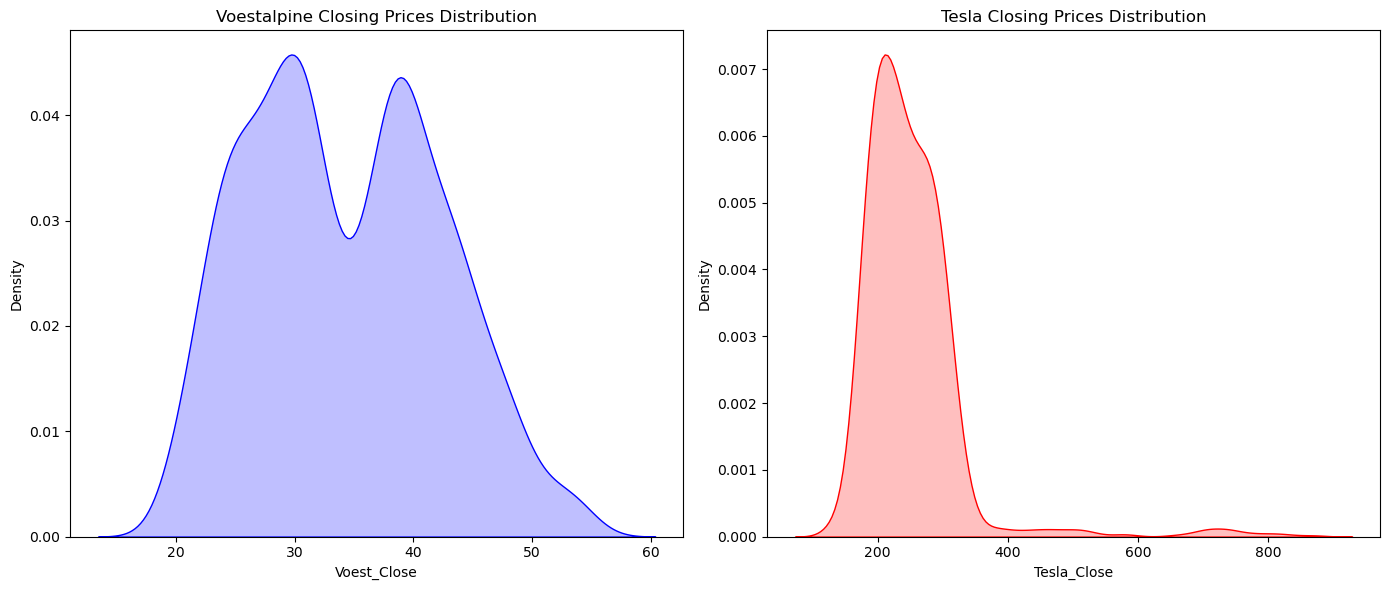

In [7]:
# Probability density function visualisation
plt.figure(figsize=(14, 6))
plt.subplot(1, 2, 1)
sns.kdeplot(stock['Voest_Close'], color='blue', fill=True)
plt.title('Voestalpine Closing Prices Distribution')

plt.subplot(1, 2, 2)
sns.kdeplot(stock['Tesla_Close'], color='red', fill=True)
plt.title('Tesla Closing Prices Distribution')
plt.tight_layout()
plt.show()

**Plotting Raw Closing Prices**

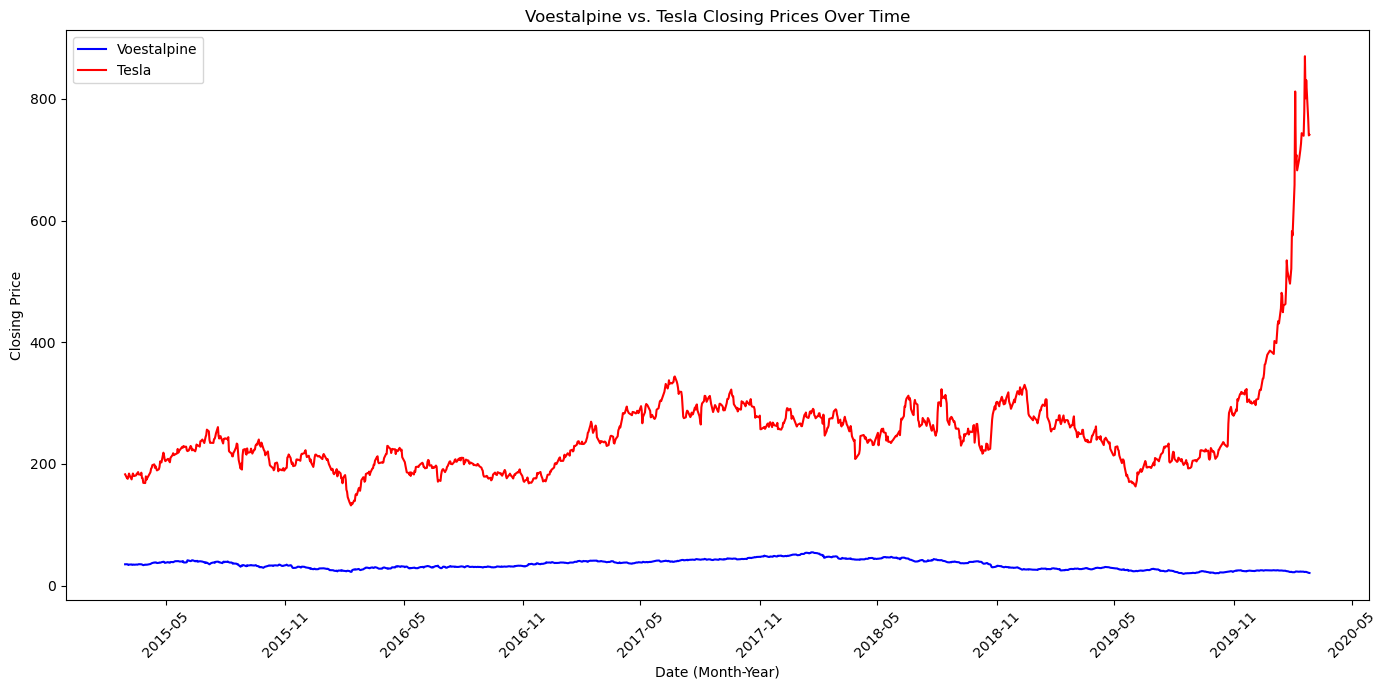

In [8]:
# Convert 'Date' to Month-Year format for easier plotting
stock['Month_Year'] = stock['Date'].dt.to_period('M').astype(str)

# Time series plot of raw closing prices
plt.figure(figsize=(14, 7))
plt.plot(stock['Date'], stock['Voest_Close'], label='Voestalpine', color='blue')
plt.plot(stock['Date'], stock['Tesla_Close'], label='Tesla', color='red')

# Formatting the x-axis to show Year-Month with fewer ticks
plt.gca().xaxis.set_major_locator(mdates.MonthLocator(interval=6))
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))
plt.xticks(rotation=45)

plt.xlabel('Date (Month-Year)')
plt.ylabel('Closing Price')
plt.title('Voestalpine vs. Tesla Closing Prices Over Time')
plt.legend()
plt.tight_layout()
plt.show()

**Standardization**  
The closing prices for both stocks are standardized using the **StandardScaler** from scikit-learn. The data has a mean of 0 and a standard deviation of 1, making it possible to compare the two stock prices on the same scale.

In [9]:
# Standardizing the closing prices
scaler = StandardScaler()
stock[['Voest_Close', 'Tesla_Close']] = scaler.fit_transform(stock[['Voest_Close', 'Tesla_Close']])
print("Standardized Closing Prices:")
print(stock[['Date', 'Voest_Close', 'Tesla_Close']].head())

Standardized Closing Prices:
        Date  Voest_Close  Tesla_Close
0 2015-02-27     0.076725    -0.834236
1 2015-03-02     0.087322    -0.912895
2 2015-03-03     0.055531    -0.924570
3 2015-03-04    -0.066644    -0.879096
4 2015-03-05     0.001924    -0.818873


**Plotting of Standardized Closing Prices**

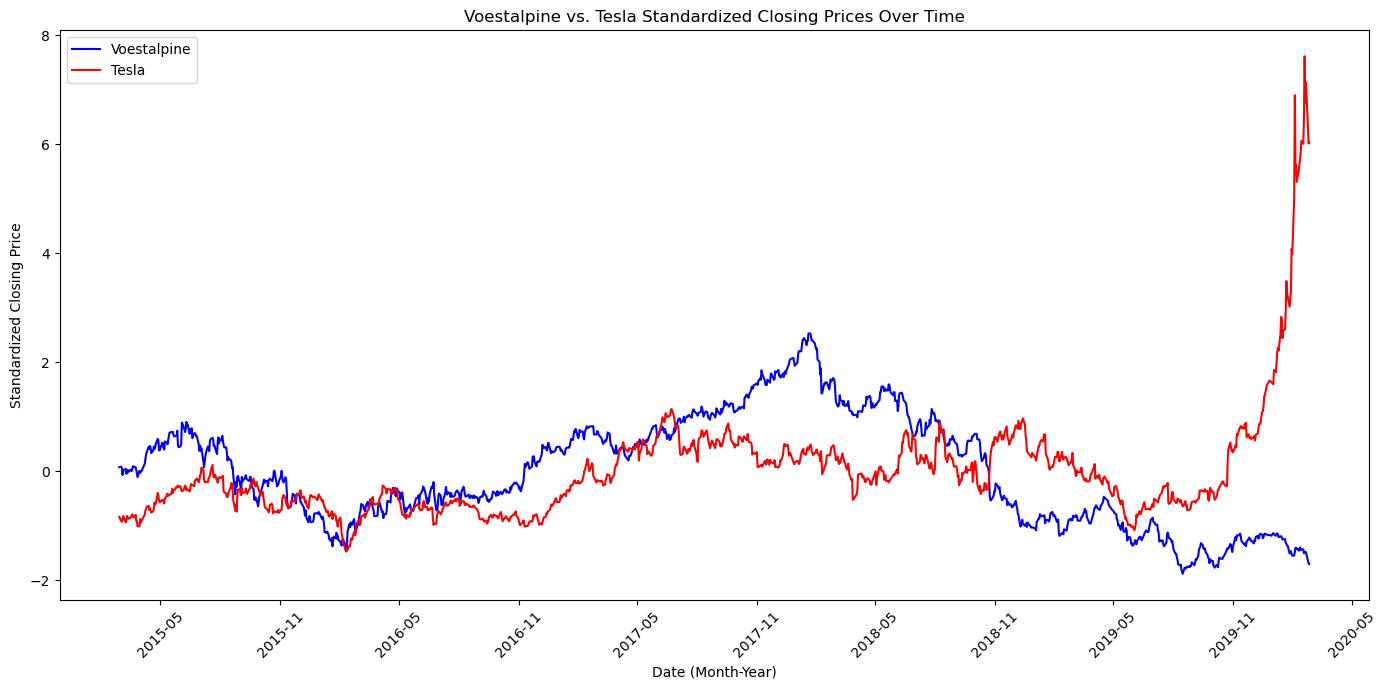

In [10]:
# Time series plot of standardized closing prices
plt.figure(figsize=(14, 7))
plt.plot(stock['Date'], stock['Voest_Close'], label='Voestalpine', color='blue')
plt.plot(stock['Date'], stock['Tesla_Close'], label='Tesla', color='red')

# Formatting the x-axis to show Year-Month with fewer ticks
plt.gca().xaxis.set_major_locator(mdates.MonthLocator(interval=6))
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))
plt.xticks(rotation=45)

plt.xlabel('Date (Month-Year)')
plt.ylabel('Standardized Closing Price')
plt.title('Voestalpine vs. Tesla Standardized Closing Prices Over Time')
plt.legend()
plt.tight_layout()
plt.show()